# 2. Simple Linear Regression

## 2.1 Problem 1
1. Do an exploratory data analysis on the `iris` dataset from `seaborn` library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import torch
import torch.nn as nn
import torch.optim as optim

# Linear regression from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
iris_data = sns.load_dataset('iris')
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


2. First use `scikit-learn` and next use PyTorch to build simple linear regression and do all the neccessary things in machine learning process.
* Feature: `petal_length`
* Target: `petal_width`

## sklearn

### Step 1: Define input and target feature

In [3]:
# Split the data into features and target
iris_data_features = iris_data.drop(columns='species')
iris_data_target = iris_data['petal_width']

# Define input feature and target feature
X = iris_data_features[['petal_length']]
y = iris_data_target

### Step 2: Split train and test set

In [4]:
# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Step 3: Train Model

In [5]:
# Create a linear regression model
lg = LinearRegression()
lg.fit(X_train, y_train)

# Predict the target
y_pred = lg.predict(X_test)

# Calculate the loss using scikit-learn
loss = mean_squared_error(y_test, y_pred)
print(f'Loss: {loss}')
print(f'y_pred: {y_pred}')

Loss: 0.04515320738549054
y_pred: [1.72445529 0.30380056 0.13666471 0.30380056 1.47375151 0.34558452
 1.72445529 1.30661566 1.5991034  0.22023263 1.97515906 1.68267133
 2.51835058 1.9333751  1.2648317  0.26201659 0.34558452 1.34839962
 1.22304774 2.05872699 2.18407888 0.09488074 1.68267133 1.80802321
 0.05309678 1.39018359 0.26201659 2.01694303 0.17844867 0.30380056]


### Step 4: LR Plot

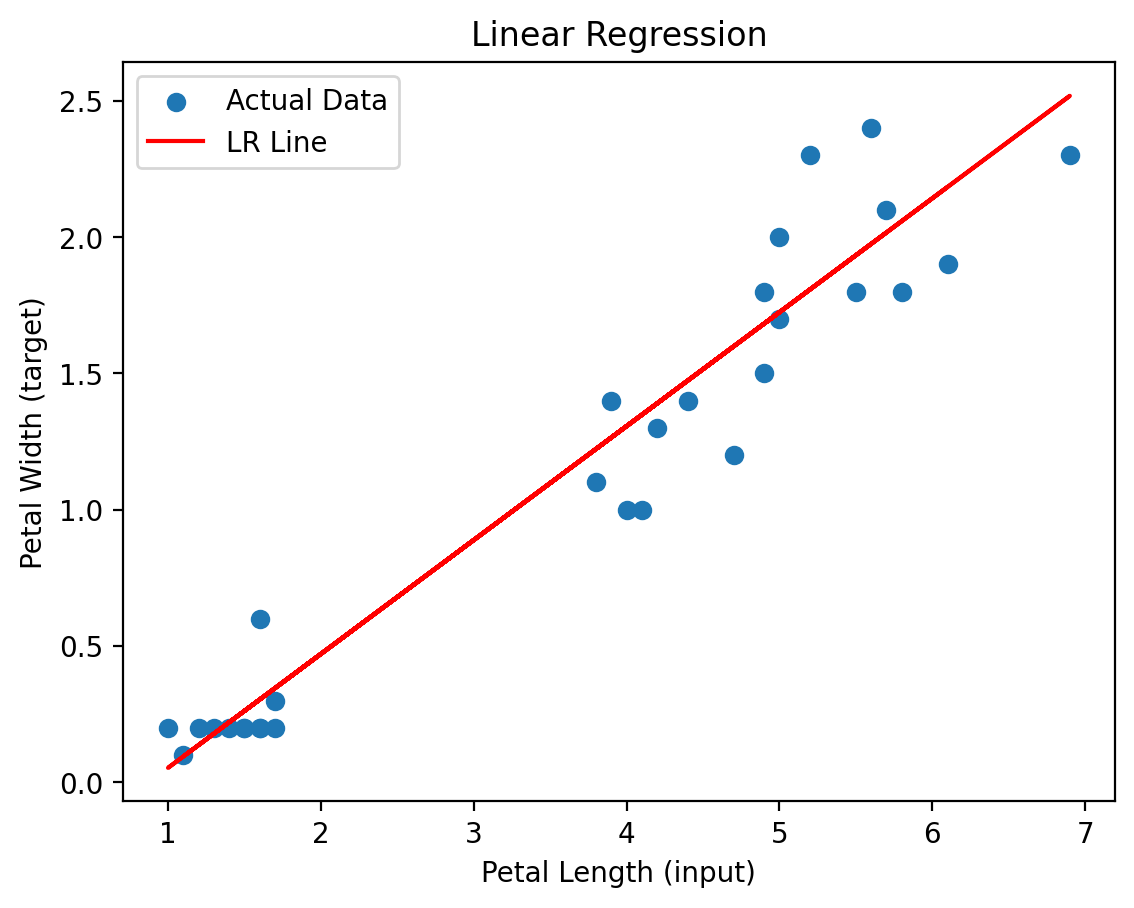

In [6]:
# Plot the data
plt.scatter(X_test, y_test, label='Actual Data')
plt.plot(X_test, y_pred, color='red', label='LR Line')
plt.title('Linear Regression')
plt.xlabel('Petal Length (input)')
plt.ylabel('Petal Width (target)')
plt.legend()
plt.show()

## PyTorch

### Step 1: Linear Regression Model

In [7]:
input_size = 1
output_size = 1
num_epochs = 1000
learning_rate = 0.01

lg_nn = nn.Linear(
    in_features=input_size,
    out_features=output_size,
    bias=True
)

### Step 2: Define loss

In [8]:
# * Feature: `petal_length`
# * Target: `petal_width
X_tensor = torch.tensor(X.values, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)

# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2)

# Convert numpy arrays to PyTorch tensors
X_train_ts = torch.tensor(X_train, dtype=torch.float32)
X_test_ts = torch.tensor(X_test, dtype=torch.float32)
y_train_ts = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test_ts = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        # Define the linear layer (input features, output features)
        self.linear = nn.Linear(in_features=X_train_ts.shape[1], out_features=1)

    def forward(self, x):
        return self.linear(x)

# Initialize the model, loss function, and optimizer
lg_nn = SimpleNN()
criterion = nn.MSELoss()
optimizer = optim.SGD(lg_nn.parameters(), lr=learning_rate)

### Step 3: Train the Model

In [9]:
# Training loop
for epoch in range(num_epochs):
    # Forward pass: Compute predicted y by passing X_train_ts to the model
    # the __call__ method of the nn.Module class is invoked, and calls the forward method
    y_pred_ts = lg_nn(X_train_ts)
    
    # Compute and print loss
    loss = criterion(y_pred_ts, y_train_ts)
    
    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1:04d}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [0010/1000], Loss: 0.0868
Epoch [0020/1000], Loss: 0.0829
Epoch [0030/1000], Loss: 0.0798
Epoch [0040/1000], Loss: 0.0770
Epoch [0050/1000], Loss: 0.0743
Epoch [0060/1000], Loss: 0.0719
Epoch [0070/1000], Loss: 0.0696
Epoch [0080/1000], Loss: 0.0674
Epoch [0090/1000], Loss: 0.0654
Epoch [0100/1000], Loss: 0.0635
Epoch [0110/1000], Loss: 0.0618
Epoch [0120/1000], Loss: 0.0602
Epoch [0130/1000], Loss: 0.0587
Epoch [0140/1000], Loss: 0.0573
Epoch [0150/1000], Loss: 0.0560
Epoch [0160/1000], Loss: 0.0547
Epoch [0170/1000], Loss: 0.0536
Epoch [0180/1000], Loss: 0.0525
Epoch [0190/1000], Loss: 0.0515
Epoch [0200/1000], Loss: 0.0506
Epoch [0210/1000], Loss: 0.0498
Epoch [0220/1000], Loss: 0.0490
Epoch [0230/1000], Loss: 0.0482
Epoch [0240/1000], Loss: 0.0475
Epoch [0250/1000], Loss: 0.0469
Epoch [0260/1000], Loss: 0.0463
Epoch [0270/1000], Loss: 0.0457
Epoch [0280/1000], Loss: 0.0452
Epoch [0290/1000], Loss: 0.0447
Epoch [0300/1000], Loss: 0.0443
Epoch [0310/1000], Loss: 0.0438
Epoch [0

In [10]:
# Evaluate the model on the test set
lg_nn.eval()
with torch.no_grad():
    y_test_pred = lg_nn(X_test_ts)
    test_loss = criterion(y_test_pred, y_test_ts)
    print(f'Test Loss: {test_loss.item():.4f}')
    
    # Calculate R-squared value
    ss_total = torch.sum((y_test_ts - torch.mean(y_test_ts)) ** 2)
    ss_res = torch.sum((y_test_ts - y_test_pred) ** 2)
    r2 = 1 - ss_res / ss_total
    print(f'R-squared: {r2.item():.4f}')

Test Loss: 0.0600
R-squared: 0.8632


### Step 4: Plot data

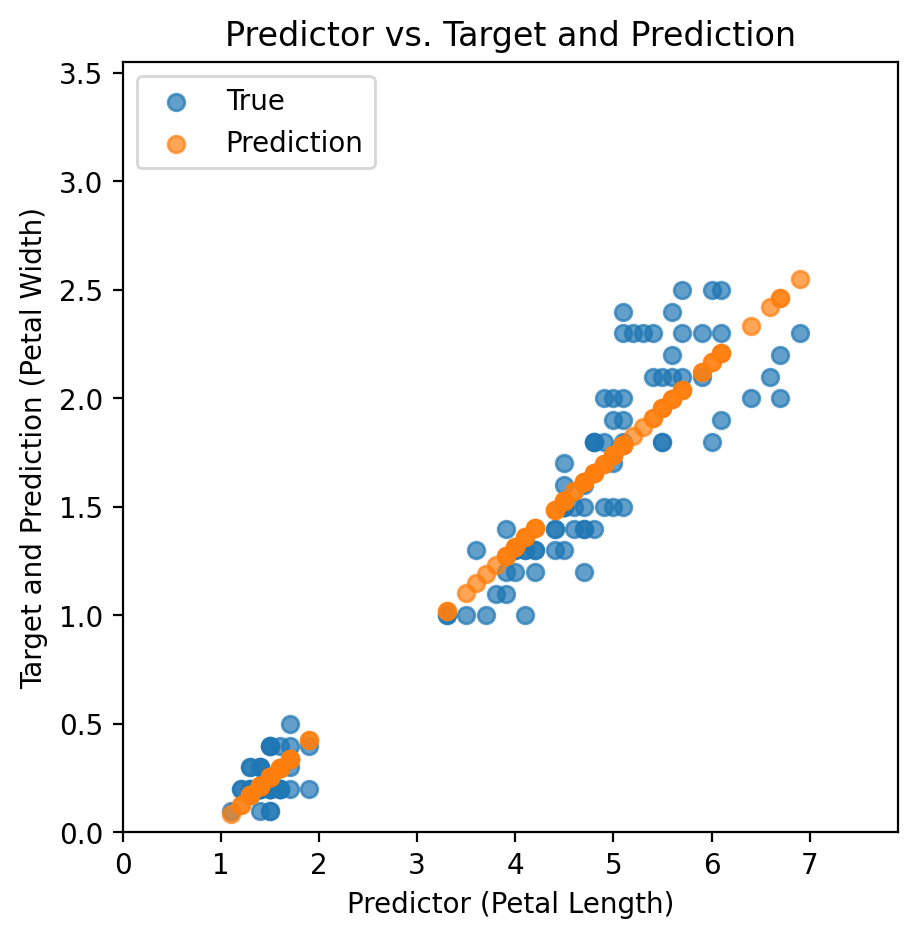

In [11]:
# Correcting the plotting code without NumPy
plt.figure(figsize=(5, 5))
plt.title("Predictor vs. Target and Prediction")
plt.xlabel("Predictor (Petal Length)")
plt.ylabel("Target and Prediction (Petal Width)")

# Set proper limits based on the data
plt.xlim(0, X_train_ts.max().item() + 1)
plt.ylim(0, max(y_train_ts.max().item(), y_pred_ts.max().item() + 1))

# Scatter plot for true values
plt.scatter(X_train_ts.squeeze().tolist(), y_train_ts.squeeze().tolist(), label="True", alpha=0.7)
# Scatter plot for predictions
plt.scatter(X_train_ts.squeeze().tolist(), y_pred_ts.squeeze().tolist(), label="Prediction", alpha=0.7)

# Add a legend and show the plot
plt.legend(loc="upper left")
plt.show()

# 3. Multi-Feature Linear Regression

## 3.1 Problem 2

### 1. Do an exploratory data analysis on the iris dataset from seaborn library.

In [12]:
# * Features: `petal_length`, `sepal_length` and `species`
# * Target: `petal_width`
iris_data_p2 = sns.load_dataset('iris')
iris_data_p2.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [31]:
iris_data_p2[iris_data_p2['species'] == 'virginica'].head()

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica


In [14]:
iris_data_p2.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [15]:
iris_data_p2.drop_duplicates(inplace=True)

In [16]:
iris_data_p2.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [17]:
# Statistical summary
iris_data_p2.describe(exclude='object') # numerical columns

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631
std,0.830851,0.436342,1.767791,0.762622
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


* The average `sepal length` for all species is `5.843624 cm`
* The average `sepal width` for all species is `3.059732 cm`
* The average `petal length` for all species is `3.748993 cm`
* The average `petal width` for all species is `1.194631 cm`

#### Countplot

In [18]:
iris_data_p2['species'].value_counts()

species
setosa        50
versicolor    50
virginica     49
Name: count, dtype: int64

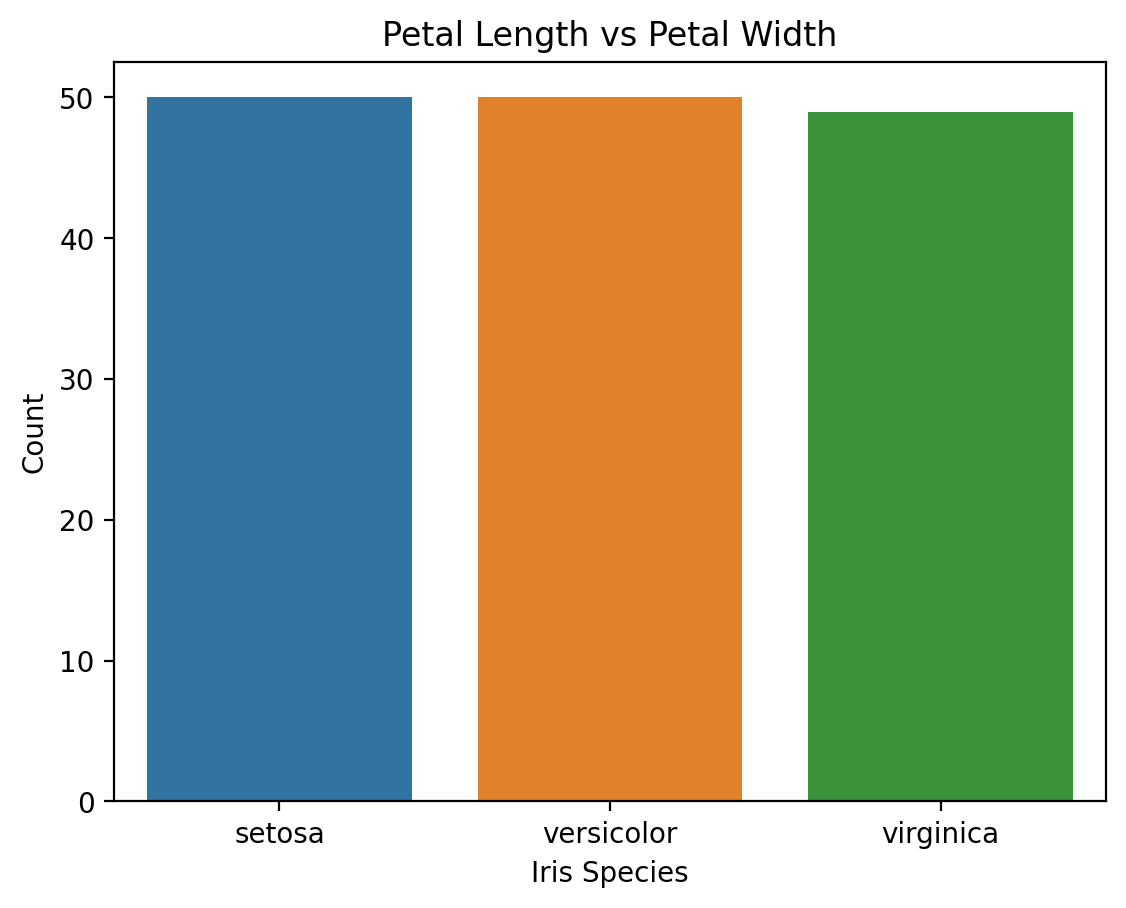

In [19]:
sns.countplot(data=iris_data_p2, x='species', hue='species')

plt.title('Petal Length vs Petal Width')
plt.xlabel('Iris Species')
plt.ylabel('Count')
plt.show()

* All kinds of Iris Species have equals distribution which is 50 observation each.

#### Pairplot

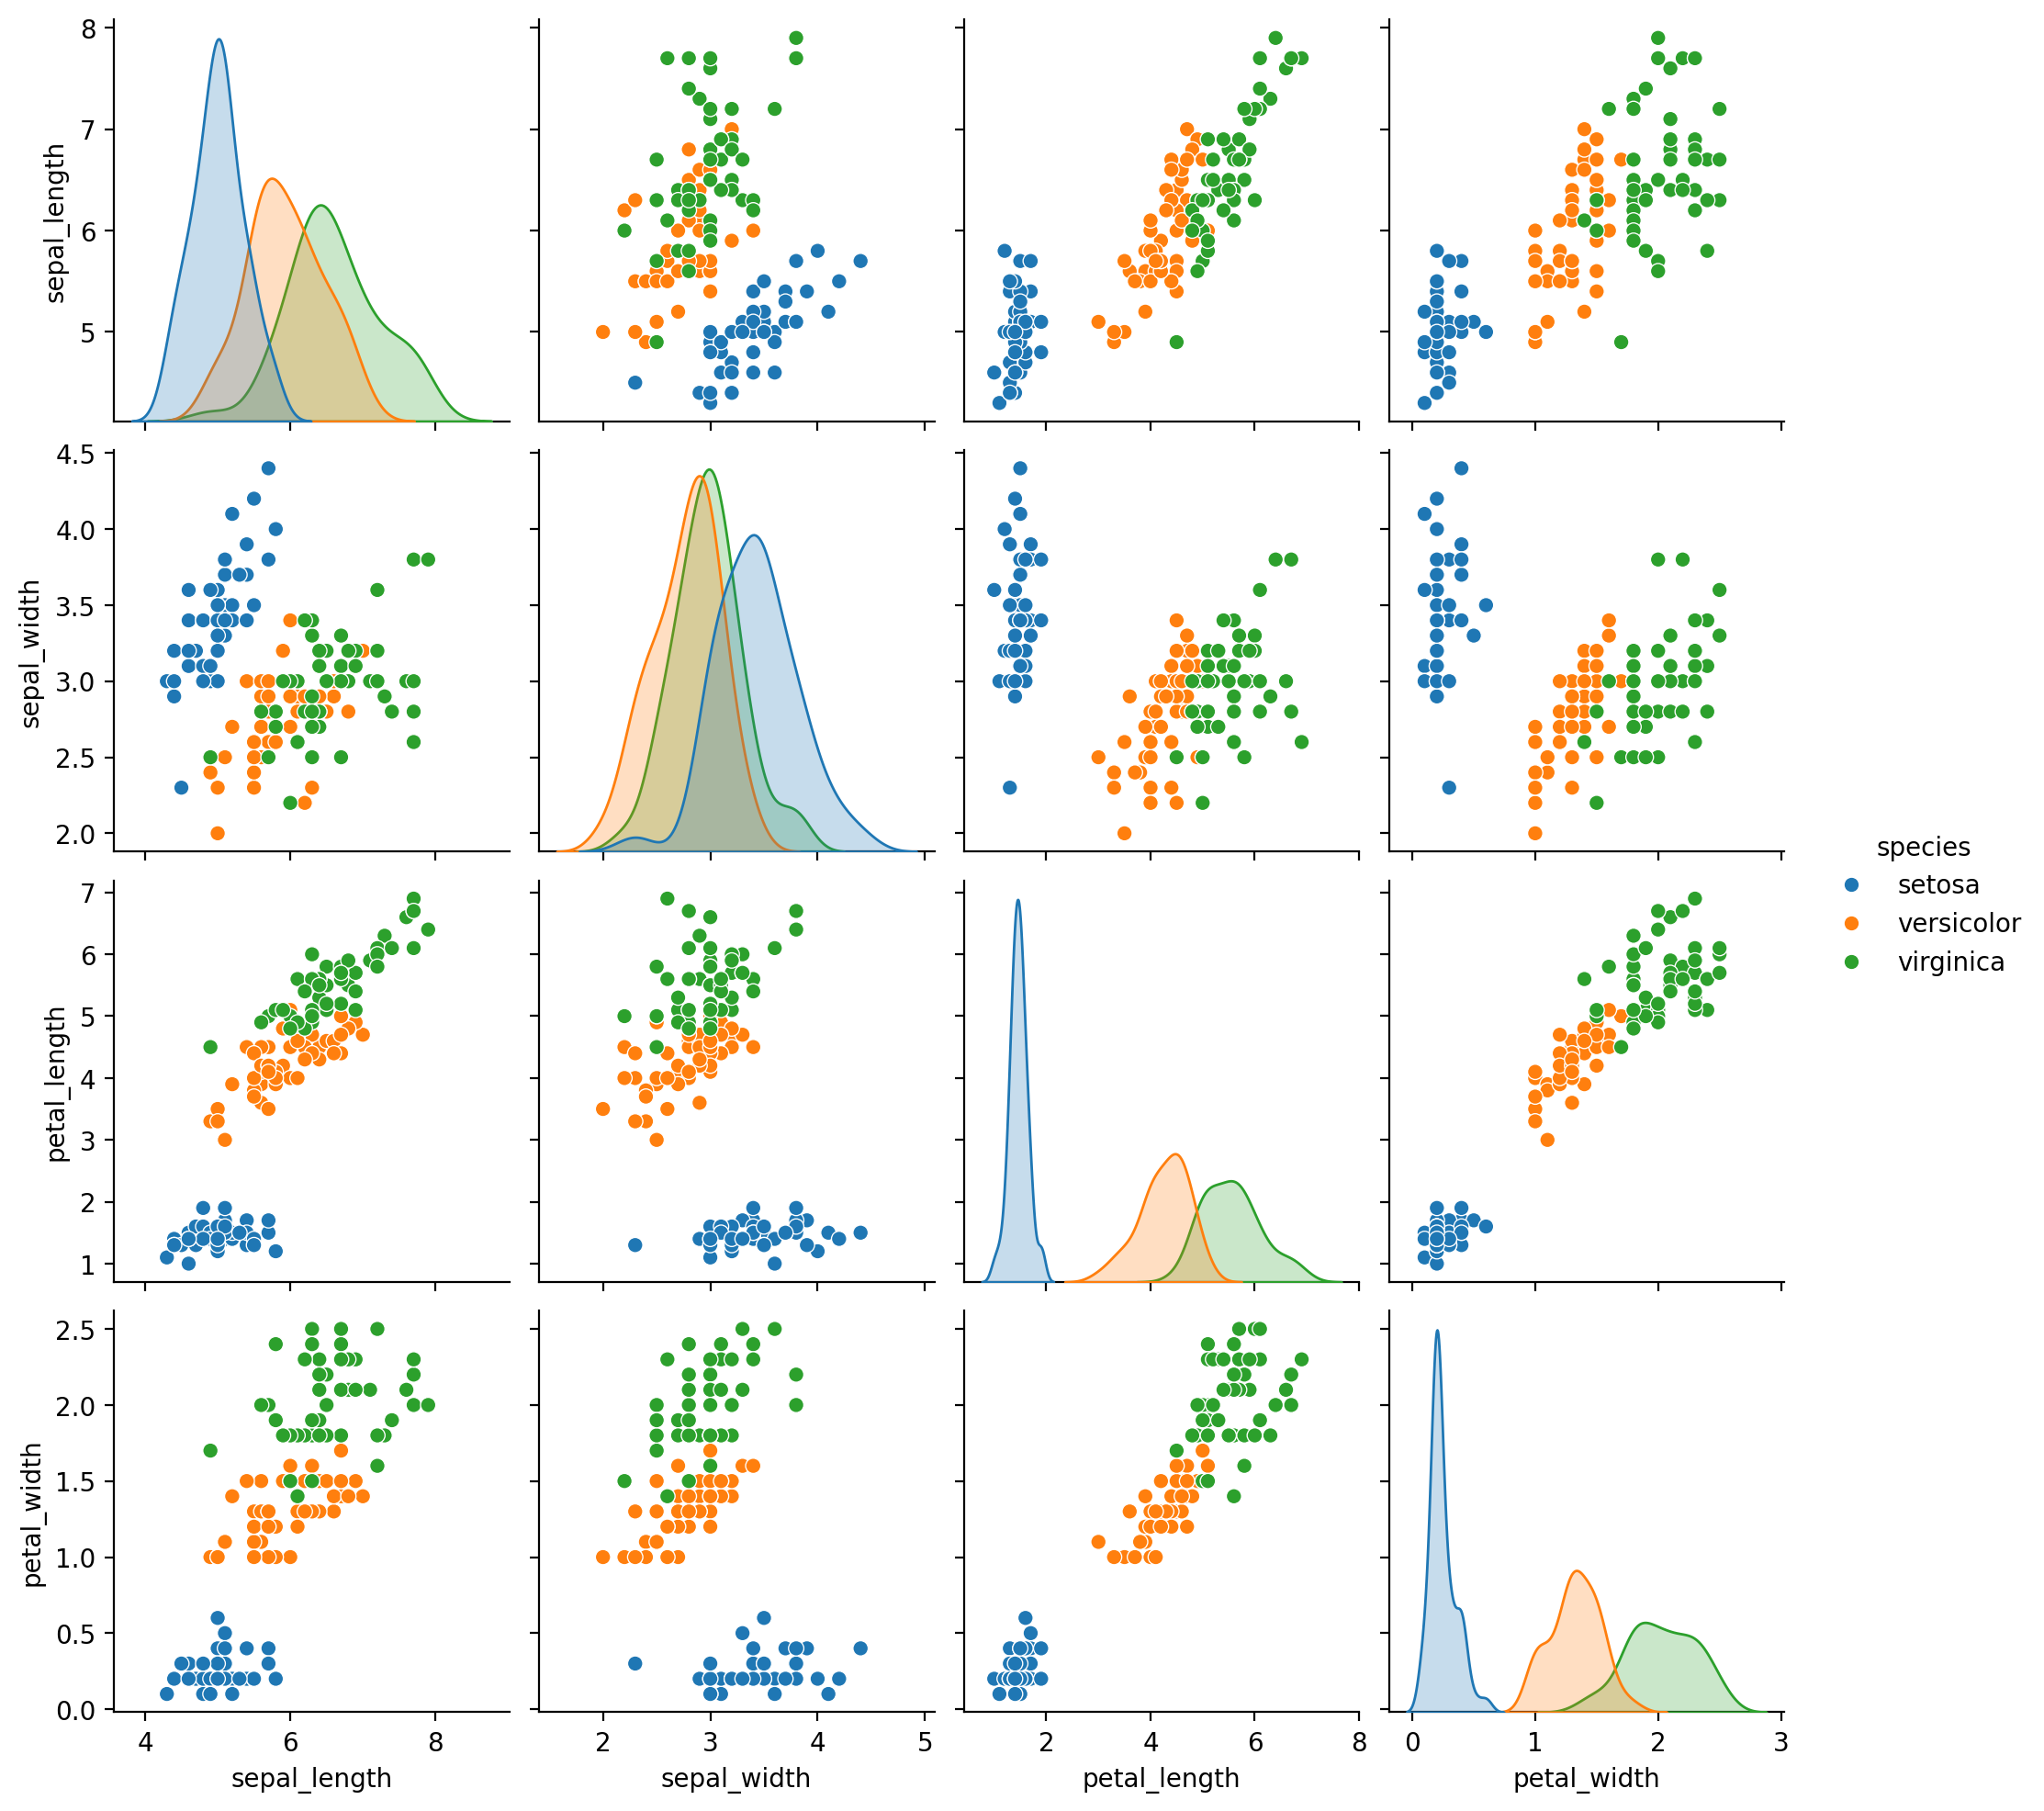

In [20]:
sns.pairplot(iris_data_p2, hue='species');

#### Correlation Matrix

In [21]:
iris_data_p2.select_dtypes(exclude='object').corr().style.background_gradient(cmap='coolwarm')

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.118129,0.873738,0.820620
sepal_width,-0.118129,1.000000,-0.426028,-0.362894
petal_length,0.873738,-0.426028,1.000000,0.962772
petal_width,0.820620,-0.362894,0.962772,1.000000


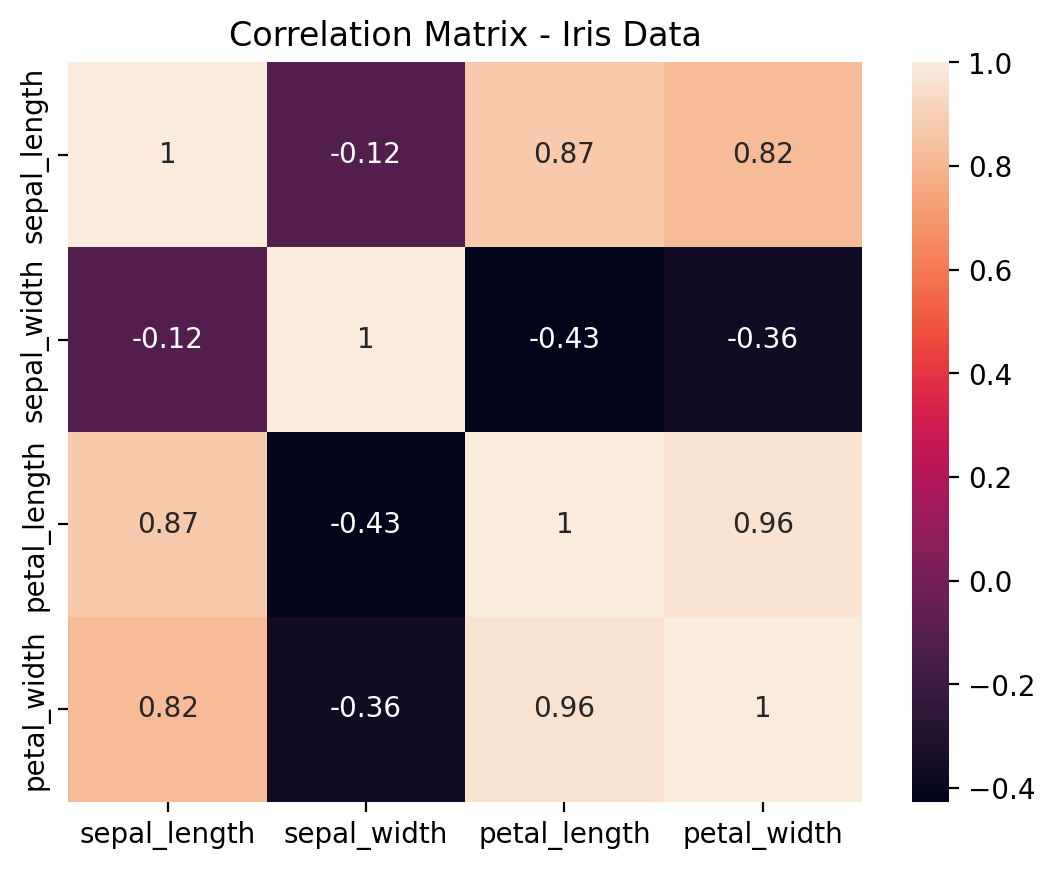

In [22]:
# Encode the species column into numerical values
iris_data_p2_encoded = iris_data_p2.copy()
iris_data_p2_encoded['species'] = iris_data_p2_encoded['species'].astype('category').cat.codes

# Plot the heatmap
sns.heatmap(iris_data_p2_encoded.corr(method='pearson').drop(
    ['species'], axis=1).drop(['species'], axis=0),
    annot=True
)

plt.title("Correlation Matrix - Iris Data")

plt.show()

* `sepal_length` is highly correlated with `petal_length` and `petal_width`
* `petal_length` is highly correlated with `patel_width`

![Iris Flower](https://miro.medium.com/v2/resize:fit:720/format:webp/0*11IwZmSKXw77eYz5)

#### Histogram

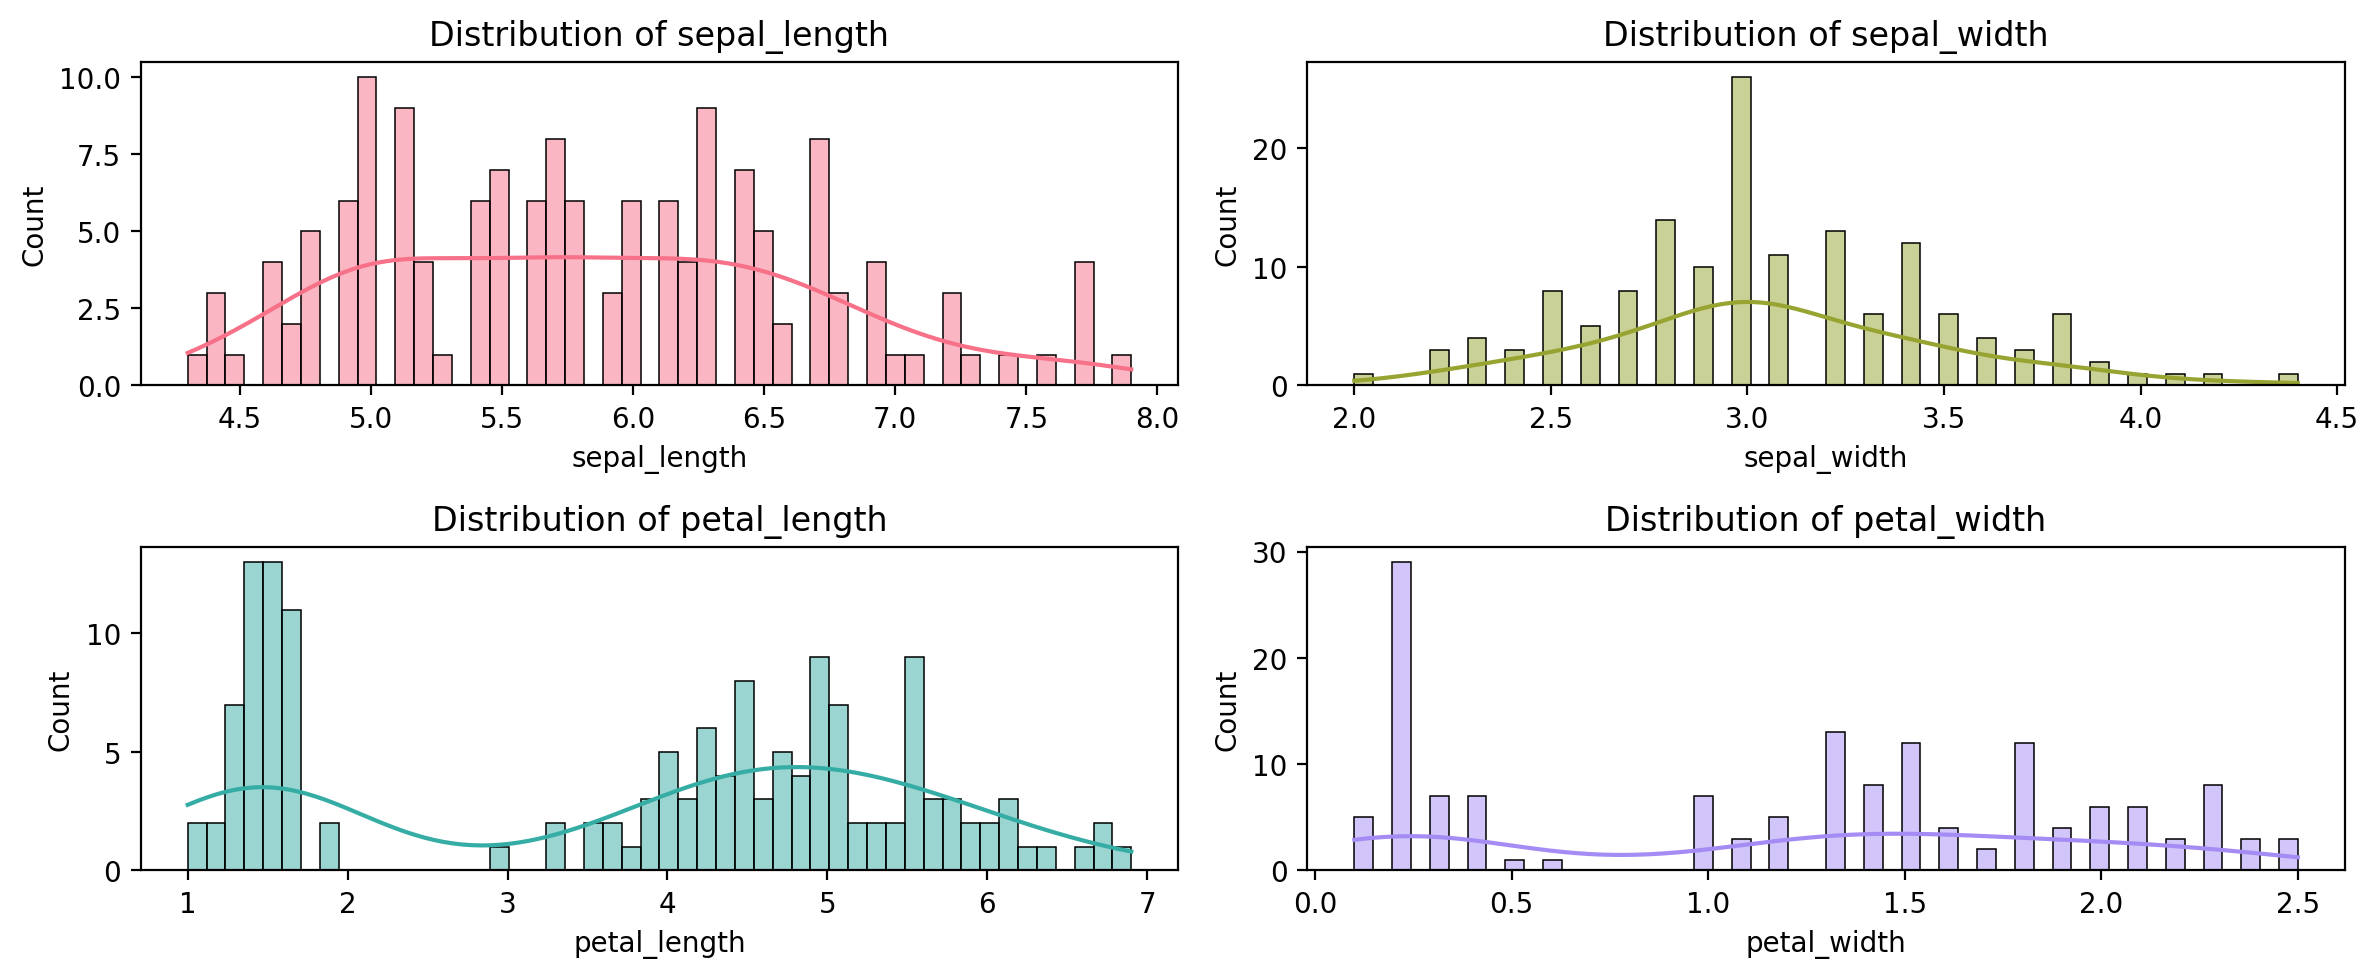

In [23]:
names = iris_data_p2.columns
colors = sns.color_palette("husl", len(names) - 1)  # Generate a color palette
fig, ax = plt.subplots(2, 2, figsize=(12, 5))
ax = ax.flatten()  # Flatten the array of axes
i = 0
for var, color in zip(names, colors):
    if var != "species":
        sns.histplot(iris_data_p2, x=var, kde=True, ax=ax[i], bins=50, color=color)
        ax[i].set_title(f"Distribution of {var}")
        i += 1
plt.tight_layout()

#### Boxplot

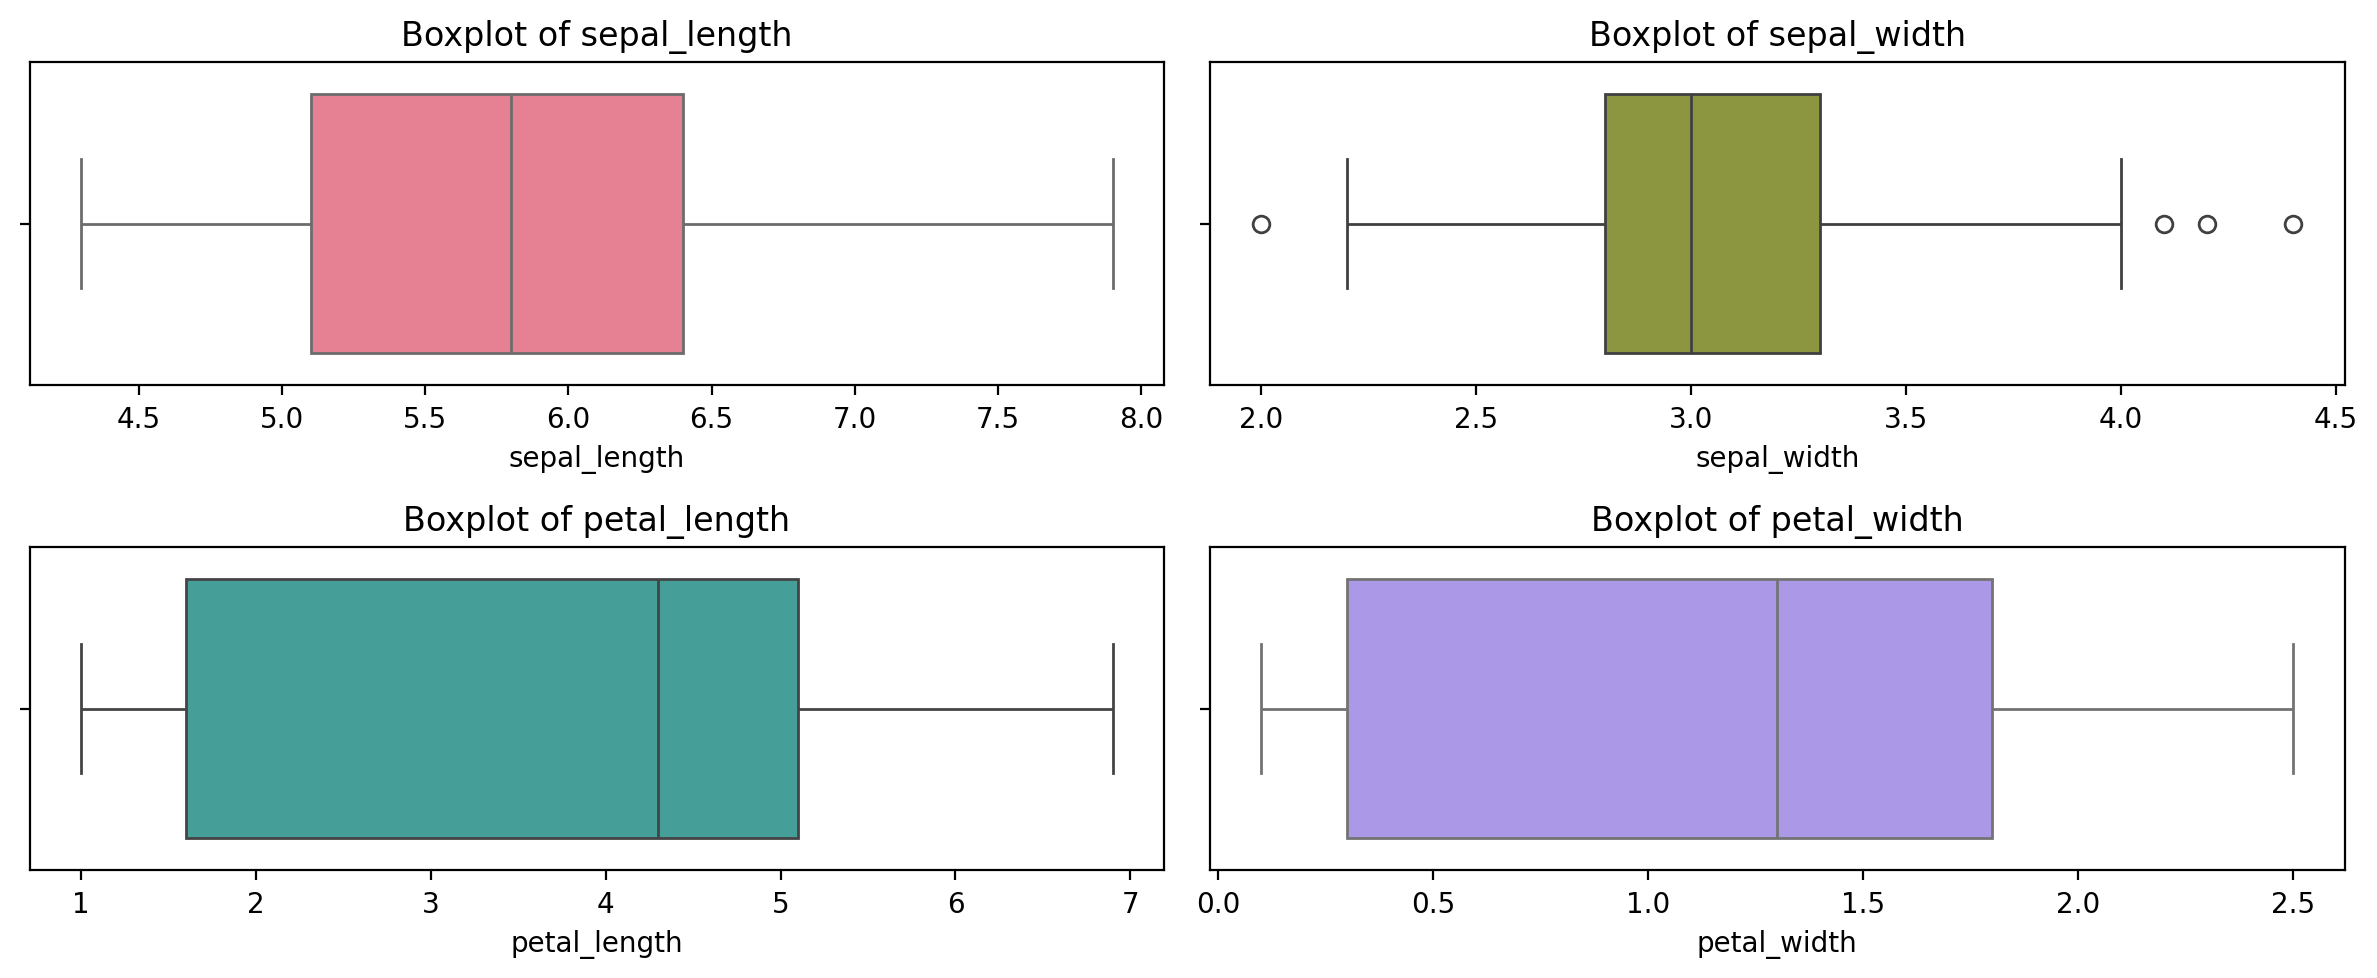

In [24]:
# Create a boxplot for each feature to identify outliers
names = iris_data_p2.columns
colors = sns.color_palette("husl", len(names) - 1)  # Generate a color palette
fig, ax = plt.subplots(2, 2, figsize=(12, 5))
ax = ax.flatten()  # Flatten the array of axes
i = 0
for var, color in zip(names, colors):
    if var != "species":
        sns.boxplot(data=iris_data_p2, x=var, ax=ax[i], color=color)
        ax[i].set_title(f"Boxplot of {var}")
        i += 1
plt.tight_layout()

### 2. First use scikit-learn and next use PyTorch to build multiple linear regression and do all the neccessary things in machine learning process.

#### sklearn
* Features: `petal_length`, `sepal_length` and `species`
* Target: `petal_width`

In [25]:
from sklearn.preprocessing import StandardScaler

# Using sklearn multiple linear regression
# * Features: `petal_length`, `sepal_length` and `species`
# * Target: `petal_width`

# Encode the species column into numerical values
iris_data_p2_encoded = iris_data_p2.copy()
iris_data_p2_encoded['species'] = iris_data_p2_encoded['species'].astype('category').cat.codes

# Define input feature and target feature
X = iris_data_p2_encoded[['petal_length', 'sepal_length', 'species']]
y = iris_data_p2_encoded['petal_width']

# Split the data into training and testing (80% training, 20% testing)
X_mlr_train, X_mlr_test, y_mlr_train, y_mlr_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the training features
scaler = StandardScaler()
X_mlr_train = scaler.fit_transform(X_mlr_train)  # Fit the scaler on the training data and transform it
X_mlr_test = scaler.transform(X_mlr_test)        # Transform the test data using the same scaler

# Define a multiple linear regression model using sklearn
sklearn_mlr = LinearRegression()
sklearn_mlr.fit(X_mlr_train, y_mlr_train)

# Predict the target
y_mlr_pred = sklearn_mlr.predict(X_mlr_test)

# Calculate the loss using scikit-learn
mlr_loss = mean_squared_error(y_mlr_test, y_mlr_pred)
print(f'Loss: {mlr_loss}')
print(f'y_pred: {y_mlr_pred}')

Loss: 0.03073925814302151
y_pred: [1.43433445 0.29722292 2.27848215 1.38366596 1.44451934 0.25121578
 1.15449243 2.01029348 1.37900462 1.22932983 2.13113802 0.23870022
 0.19588595 0.26286913 0.25820779 1.42967311 2.01961616 1.23399117
 1.39065798 2.19432207 0.29403005 1.83411911 0.28703804 1.83878045
 2.01728549 1.90429516 1.88245692 1.89877162 0.23870022 0.29169938]


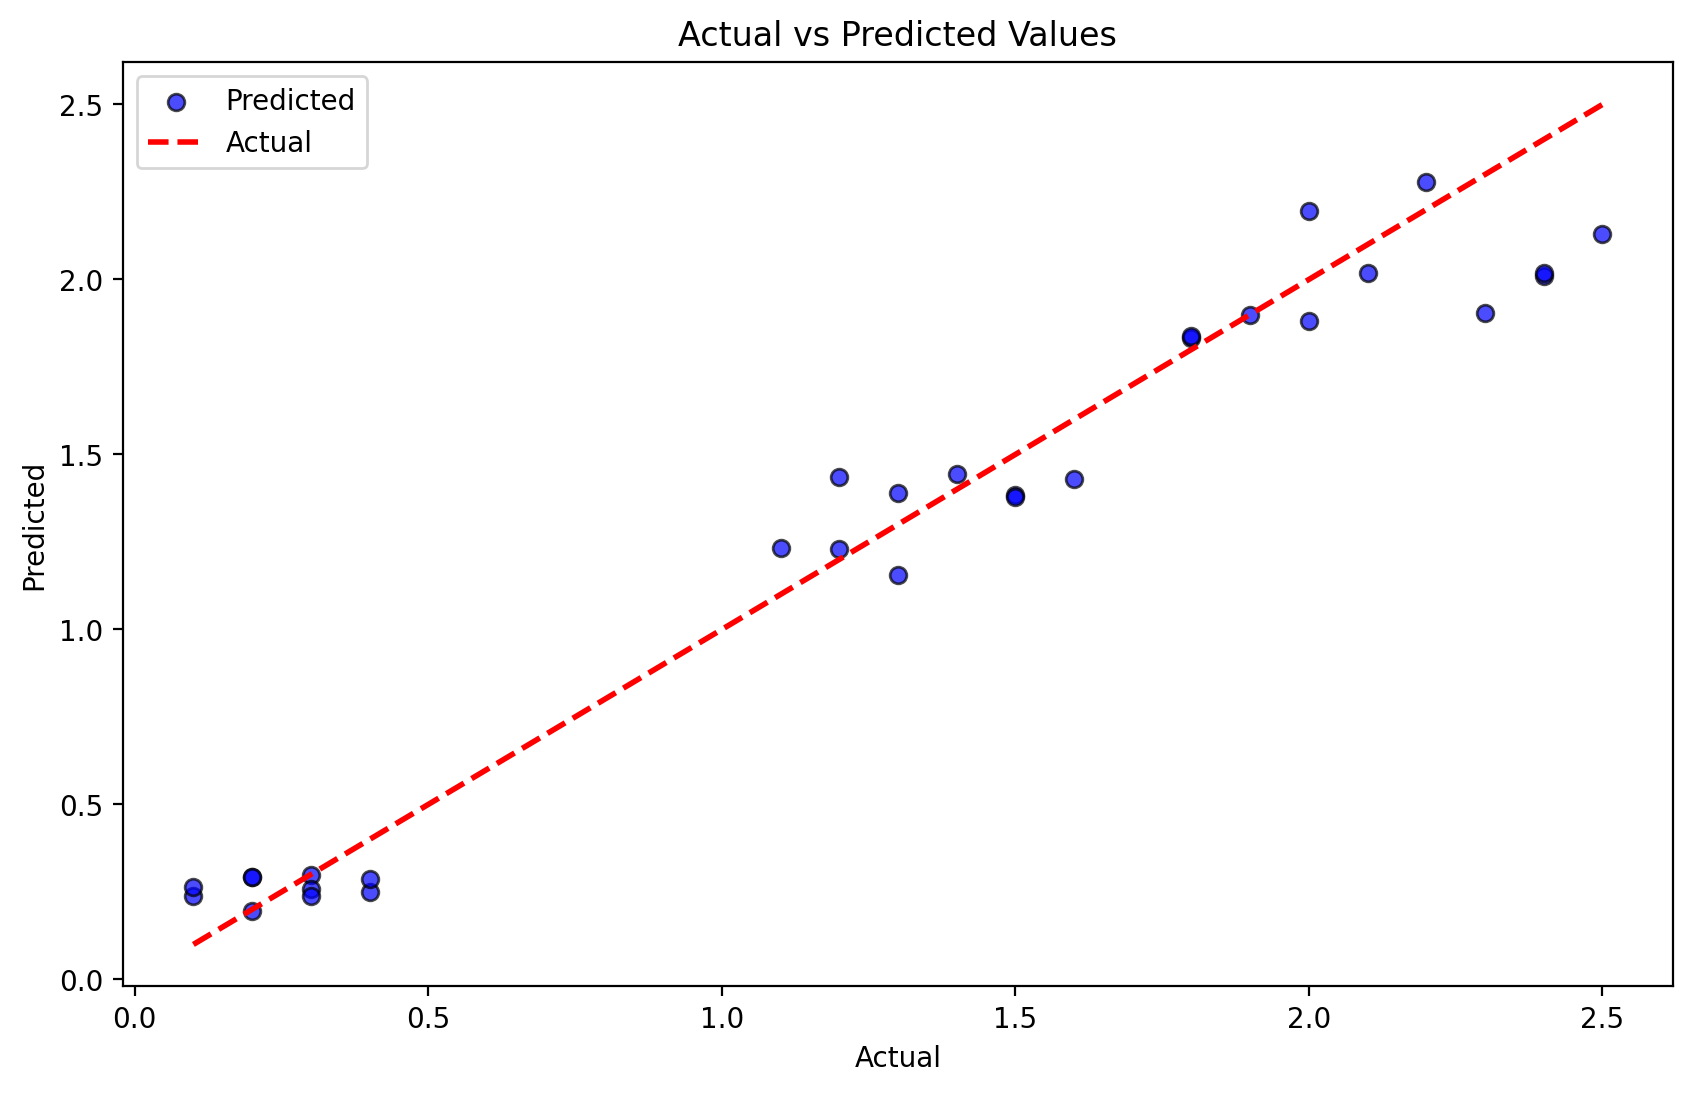

In [26]:
# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_mlr_test, y_mlr_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_mlr_test.min(), y_mlr_test.max()], [y_mlr_test.min(), y_mlr_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.legend(['Predicted', 'Actual'])
plt.show()

#### PyTorch

In [27]:
# Convert numpy arrays to PyTorch tensors
X_train_mlr_ts = torch.tensor(X_mlr_train, dtype=torch.float32)
X_test_mlr_ts = torch.tensor(X_mlr_test, dtype=torch.float32)
y_train_mlr_ts = torch.tensor(y_mlr_train.values, dtype=torch.float32).view(-1, 1)
y_test_mlr_ts = torch.tensor(y_mlr_test.values, dtype=torch.float32).view(-1, 1)

# Use PyTorch to create a multiple linear regression model
class MultipleLinearRegression(nn.Module):
    def __init__(self):
        super(MultipleLinearRegression, self).__init__()
        self.linear = nn.Linear(in_features=X_train_mlr_ts.shape[1], out_features=1)

    def forward(self, x):
        return self.linear(x)

# Initialize the model, loss function, and optimizer
pytorch_mlr = MultipleLinearRegression()
criterion = nn.MSELoss()
learning_rate = 0.01
num_epochs = 500
optimizer = optim.SGD(
    pytorch_mlr.parameters(), 
    lr=learning_rate
    )

# Training loop
for epoch in range(num_epochs):
    # Forward pass: Compute predicted y by passing X_train_mlr_ts to the model
    y_pred_ts = pytorch_mlr(X_train_mlr_ts)
    
    # Compute and print loss
    loss = criterion(y_pred_ts, y_train_mlr_ts)
    
    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1:04d}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [0010/500], Loss: 1.9761
Epoch [0020/500], Loss: 1.3489
Epoch [0030/500], Loss: 0.9326
Epoch [0040/500], Loss: 0.6541
Epoch [0050/500], Loss: 0.4668
Epoch [0060/500], Loss: 0.3403
Epoch [0070/500], Loss: 0.2543
Epoch [0080/500], Loss: 0.1955
Epoch [0090/500], Loss: 0.1550
Epoch [0100/500], Loss: 0.1268
Epoch [0110/500], Loss: 0.1069
Epoch [0120/500], Loss: 0.0927
Epoch [0130/500], Loss: 0.0823
Epoch [0140/500], Loss: 0.0745
Epoch [0150/500], Loss: 0.0686
Epoch [0160/500], Loss: 0.0640
Epoch [0170/500], Loss: 0.0603
Epoch [0180/500], Loss: 0.0573
Epoch [0190/500], Loss: 0.0548
Epoch [0200/500], Loss: 0.0526
Epoch [0210/500], Loss: 0.0508
Epoch [0220/500], Loss: 0.0491
Epoch [0230/500], Loss: 0.0477
Epoch [0240/500], Loss: 0.0464
Epoch [0250/500], Loss: 0.0453
Epoch [0260/500], Loss: 0.0442
Epoch [0270/500], Loss: 0.0433
Epoch [0280/500], Loss: 0.0424
Epoch [0290/500], Loss: 0.0417
Epoch [0300/500], Loss: 0.0410
Epoch [0310/500], Loss: 0.0403
Epoch [0320/500], Loss: 0.0397
Epoch [0

In [28]:
# Evaluate the model on the test set
pytorch_mlr.eval()
with torch.no_grad():
    y_mlr_test_pred = pytorch_mlr(X_test_mlr_ts)
    test_loss = criterion(y_mlr_test_pred, y_test_mlr_ts)
    print(f'Test Loss: {test_loss.item():.4f}')
    
    # Calculate R-squared value
    ss_total = torch.sum((y_test_mlr_ts - torch.mean(y_test_mlr_ts)) ** 2)
    ss_res = torch.sum((y_test_mlr_ts - y_mlr_test_pred) ** 2)
    r2 = 1 - ss_res / ss_total
    print(f'R-squared: {r2.item():.4f}')

Test Loss: 0.0379
R-squared: 0.9416


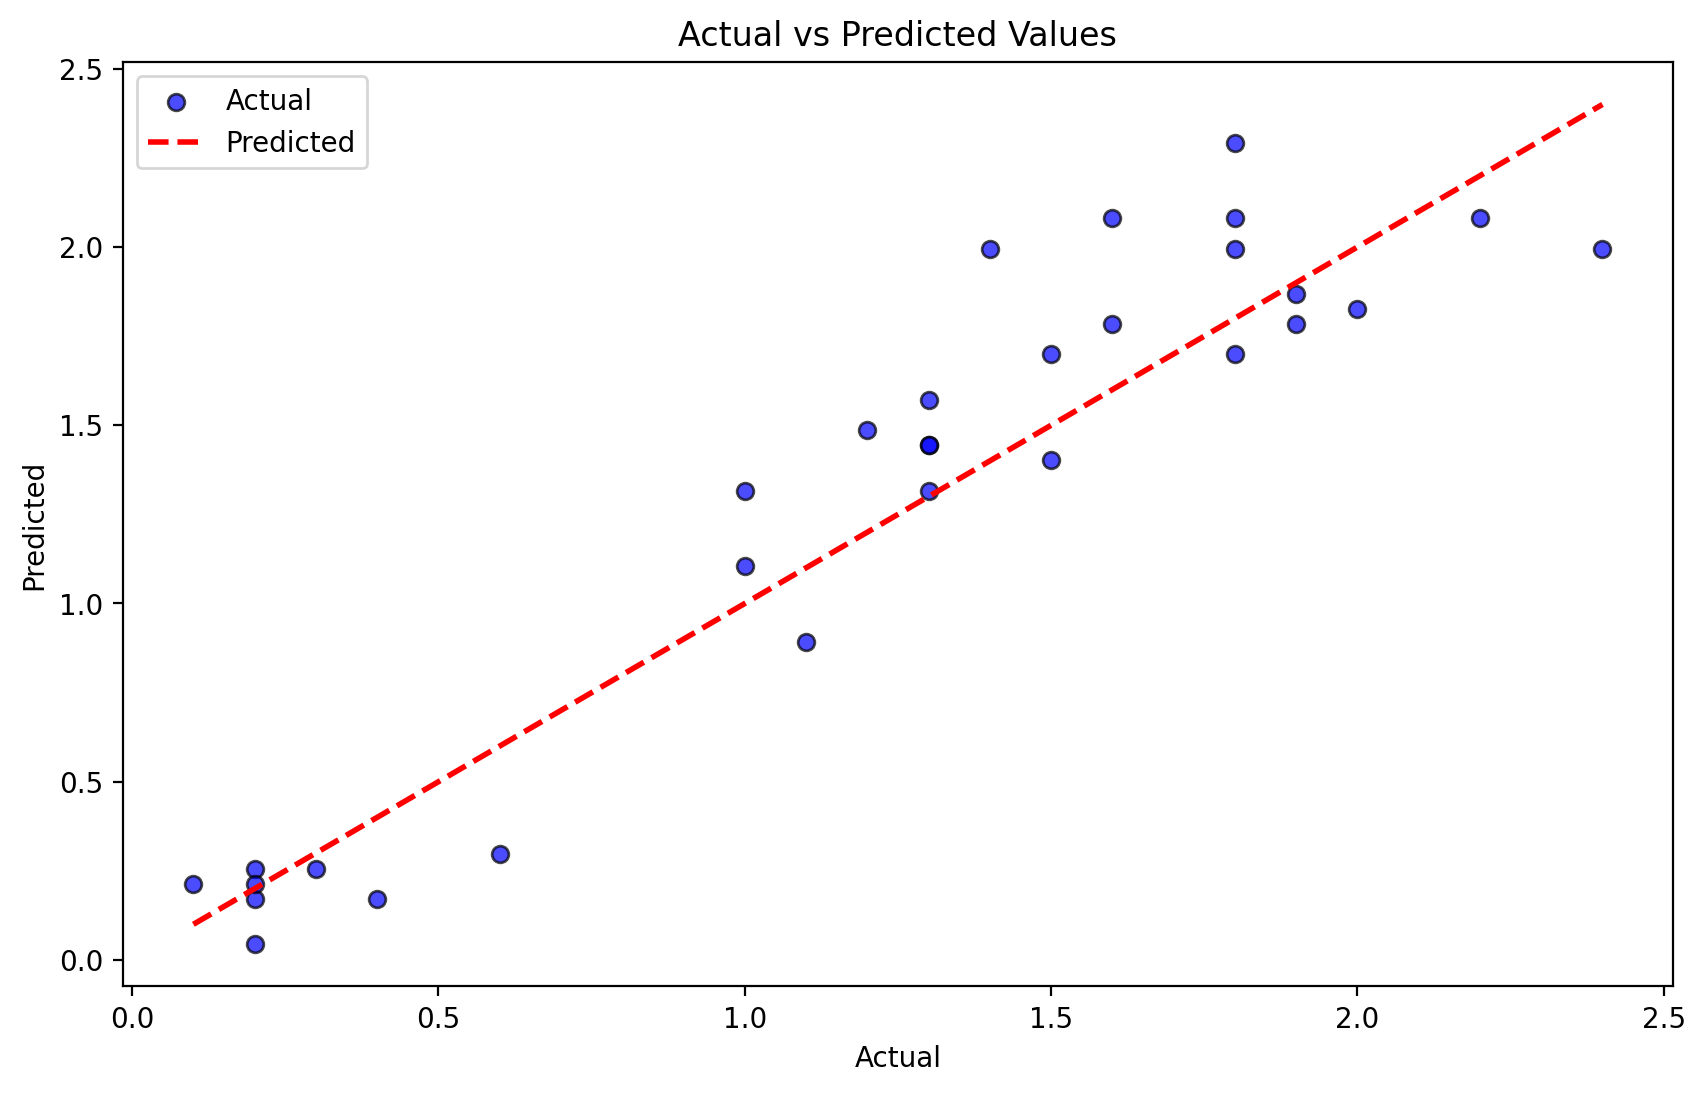

In [29]:
# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_ts.squeeze().tolist(), y_test_pred.squeeze().tolist(), color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test_ts.min().item(), y_test_ts.max().item()], [y_test_ts.min().item(), y_test_ts.max().item()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.legend(['Actual', 'Predicted'])
plt.show()

In [30]:

# Save model both sklearn and PyTorch
import joblib

# Save the sklearn multiple linear regression model and scaler
joblib.dump(
    sklearn_mlr, 
    '/Users/mac/Desktop/Home/Year 5/NLP/NLP-Project/src/P1/PDS-Regression/model/sklearn_iris_mlr_model.pkl')

# Save the PyTorch multiple linear regression model
torch.save(
    obj=pytorch_mlr.state_dict(),
    f='/Users/mac/Desktop/Home/Year 5/NLP/NLP-Project/src/P1/PDS-Regression/model/pytorch_iris_mlr_model.pkl'
)

# Save the scaler using joblib
joblib.dump(
    scaler, 
    '/Users/mac/Desktop/Home/Year 5/NLP/NLP-Project/src/P1/PDS-Regression/model/scaler_mlr_model.pkl'
)

['/Users/mac/Desktop/Home/Year 5/NLP/NLP-Project/src/P1/PDS-Regression/model/scaler_mlr_model.pkl']

### 3. Build and deploy streamlit web application (or any other framework) with both input features output prediction are in raw data.

* For streamlit deployment:
    * Check out in `src/P1/PDS-Regression/app.py`